In [4]:
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [5]:
##Reading in rice and wheat data 

df_riceCH = pd.read_csv('rice_CH.csv', usecols=[0,4])
df_wheatCH = pd.read_csv('wheat_CH.csv', usecols=[0,4])

df_riceCH['Date'] = pd.to_datetime(df_riceCH['Date'])
df_wheatCH['Date'] = pd.to_datetime(df_wheatCH['Date'])

df_riceCH.set_index('Date', inplace=True)
df_wheatCH.set_index('Date', inplace=True)

##Splitting into train and test

train_rice, test_rice = train_test_split(df_riceCH, test_size=0.2, random_state=25,shuffle=False)
train_wheat, test_wheat = train_test_split(df_wheatCH, test_size=0.2, random_state=25,shuffle = False) #cutting off around 2022

train_rice.head




<bound method NDFrame.head of             CLOSE
Date             
2012-07-26   2764
2012-07-27   2765
2012-08-03   2788
2012-08-06   2835
2012-08-17   2835
...           ...
2021-02-26   2582
2021-03-01   2582
2021-03-02   2582
2021-03-03   2582
2021-03-04   2582

[2053 rows x 1 columns]>

## Seasonal Decomposition

Level: The average value in the series.

Trend: The increasing or decreasing value in the series.

Seasonality: The repeating short-term cycle in the series.

Noise: The random variation in the series. ( nonsytematic)

If trend and seasonal variation are constant: use additive model
Otherwise, use multiplicative model. 

## Rice Plot

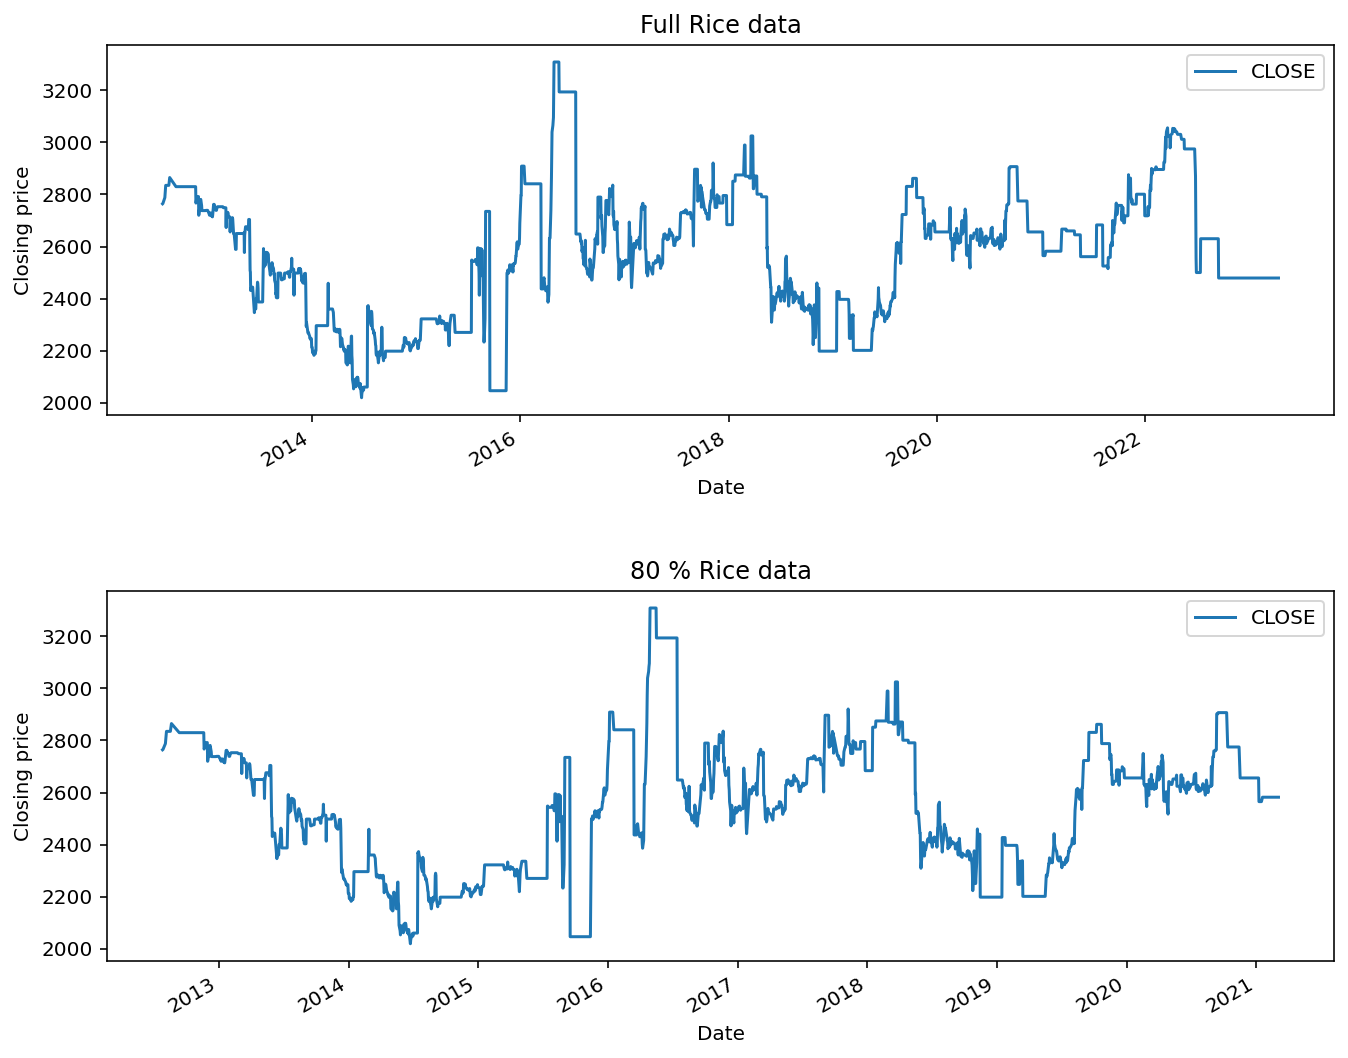

In [6]:
# Create a new figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot the first plot on the first subplot
df_riceCH.plot(ax=ax1)
ax1.set_title("Full Rice data")
ax1.set_ylabel("Closing price")

# Plot the second plot on the second subplot
train_rice.plot(ax=ax2)
ax2.set_title("80 % Rice data")
ax2.set_ylabel("Closing price")

# Adjust the layout and spacing between the subplots
fig.tight_layout(pad=3.0)

# Show the plot
plt.show()

## Wheat plot

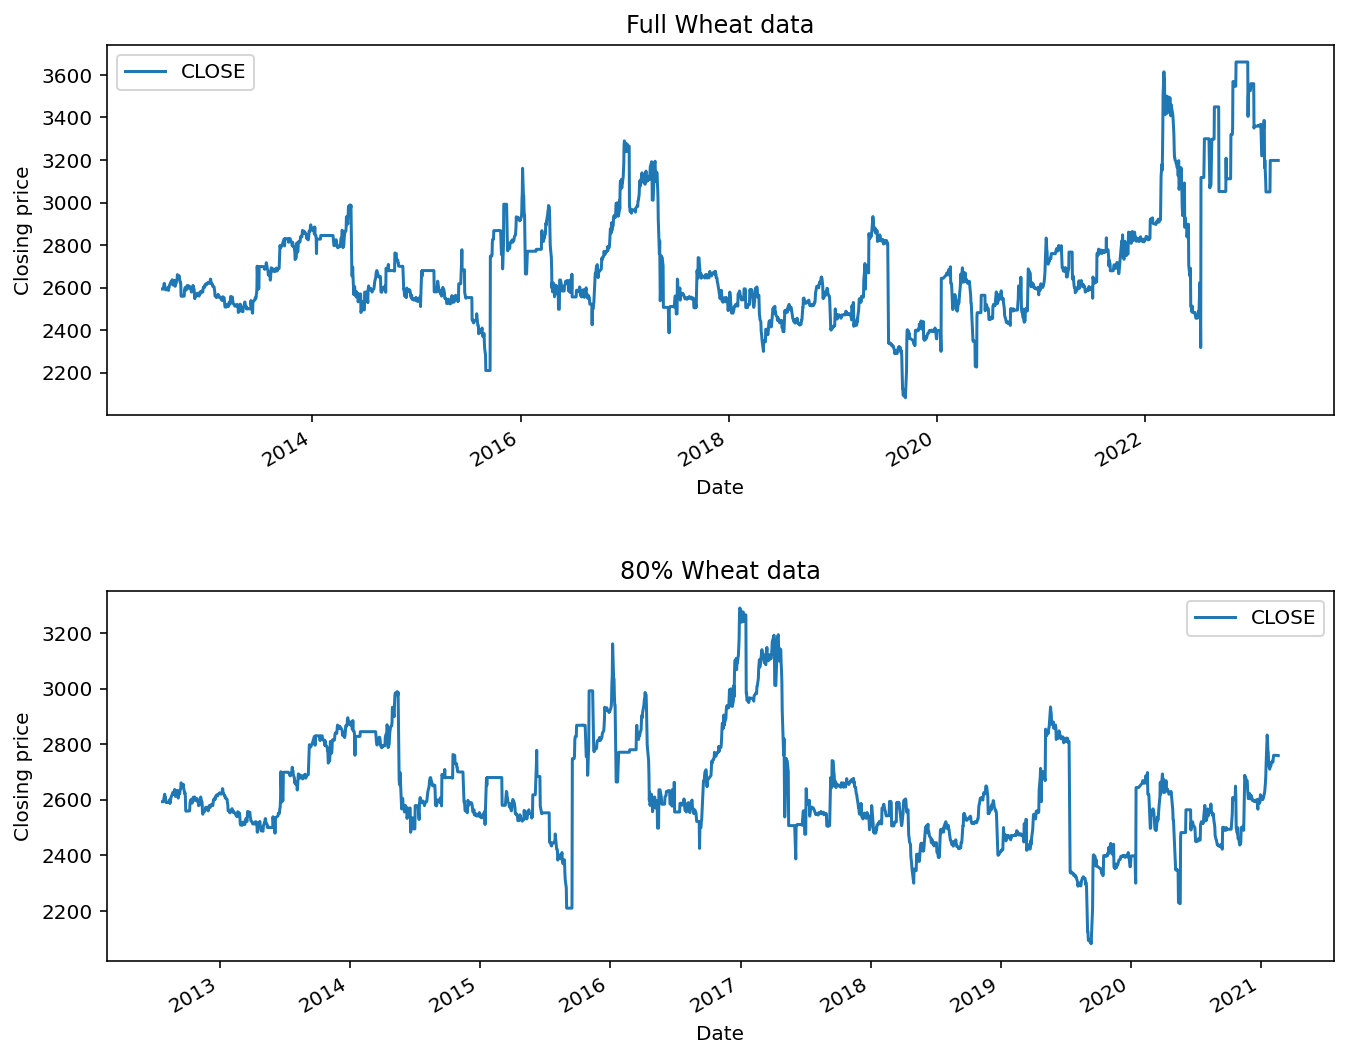

In [7]:
# Create a new figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot the first plot on the first subplot
df_wheatCH.plot(ax=ax1)
ax1.set_title("Full Wheat data")
ax1.set_ylabel("Closing price")

# Plot the second plot on the second subplot
train_wheat.plot(ax=ax2)
ax2.set_title("80% Wheat data")
ax2.set_ylabel("Closing price")

# Adjust the layout and spacing between the subplots
fig.tight_layout(pad=3.0)

# Show the plot
plt.show()

## Plot Result

Based off the plots of our rice and wheat data, a multiplicative model is better suited to decompose both sets of data as variation in trend and seasonality is not constant. 



## Full data sets\(sd on train\)

Here, we cut our data 80/20 into train and test and build new SD models. 
For our wheat model, only looking at 80% percent of the data gives us a more seasonal component. However, running our predictions on the test set might not be as accurate because our test set contains a much larger magnitude peak then in the training data. So I think we should use dataset for wheat that cuts off around 2021, split into 80/20 train set and remake sd model. 



# Additive/Multi Wheat Models



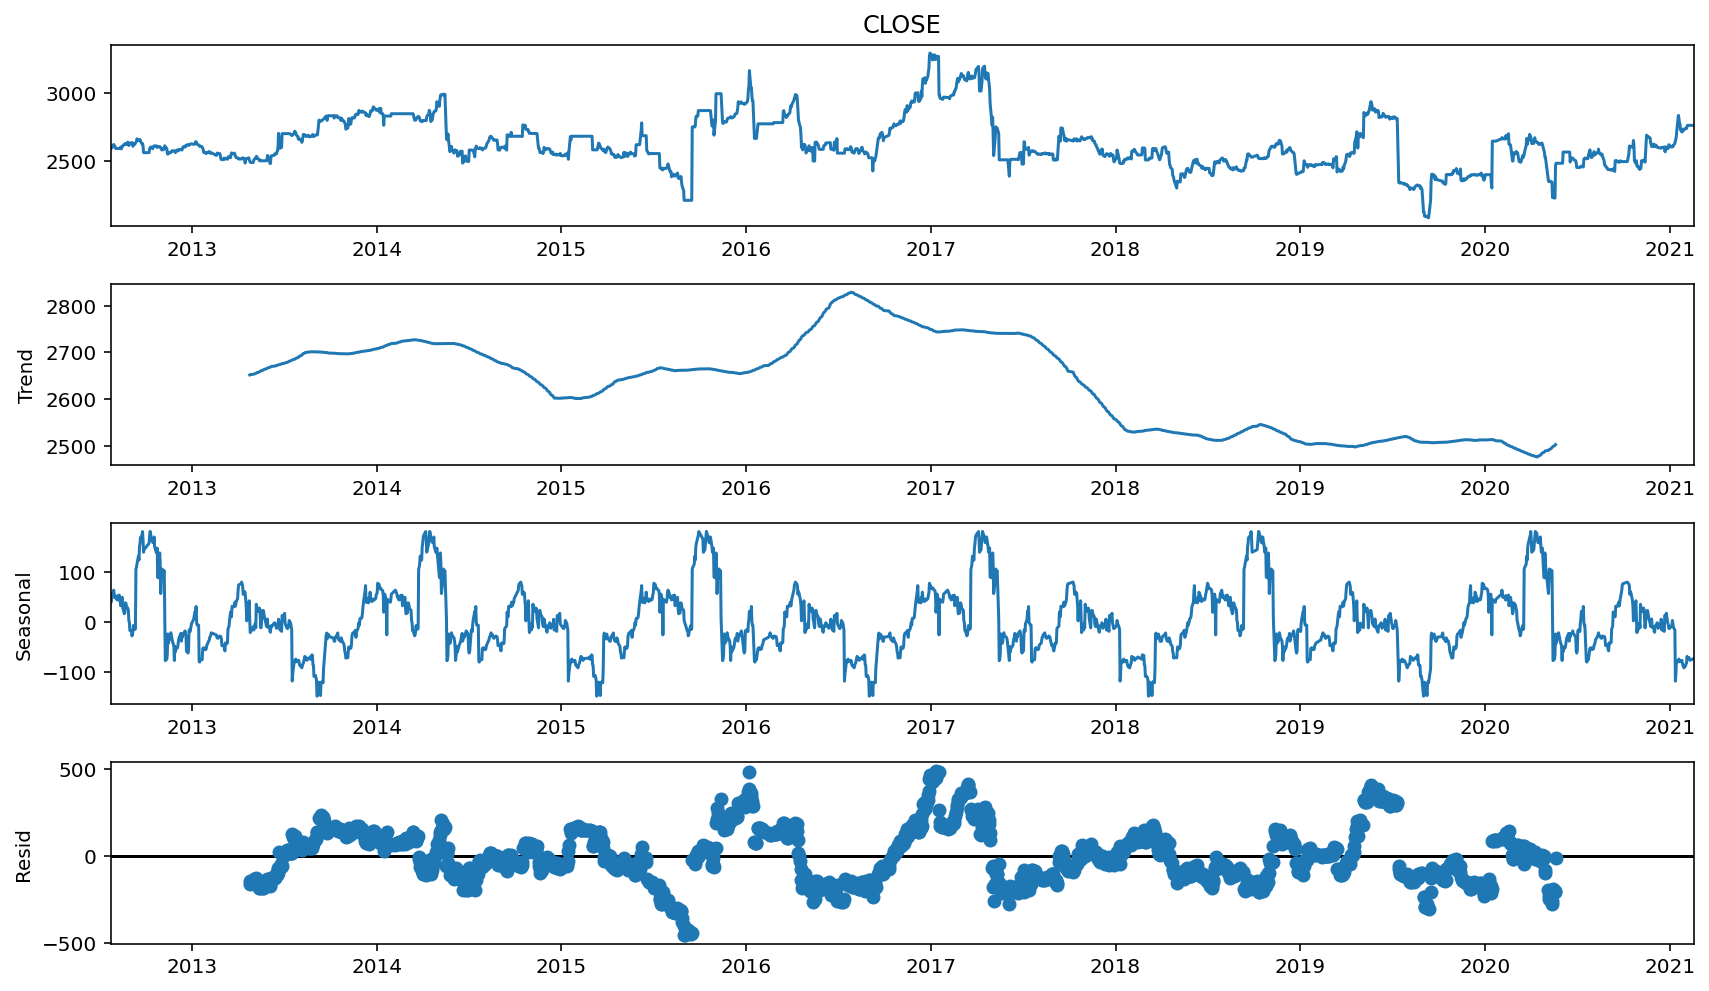

In [8]:
#Additive Wheat Model
adwheat = seasonal_decompose(train_wheat['CLOSE'], model = 'additive', period = 365)
aw = adwheat.plot()

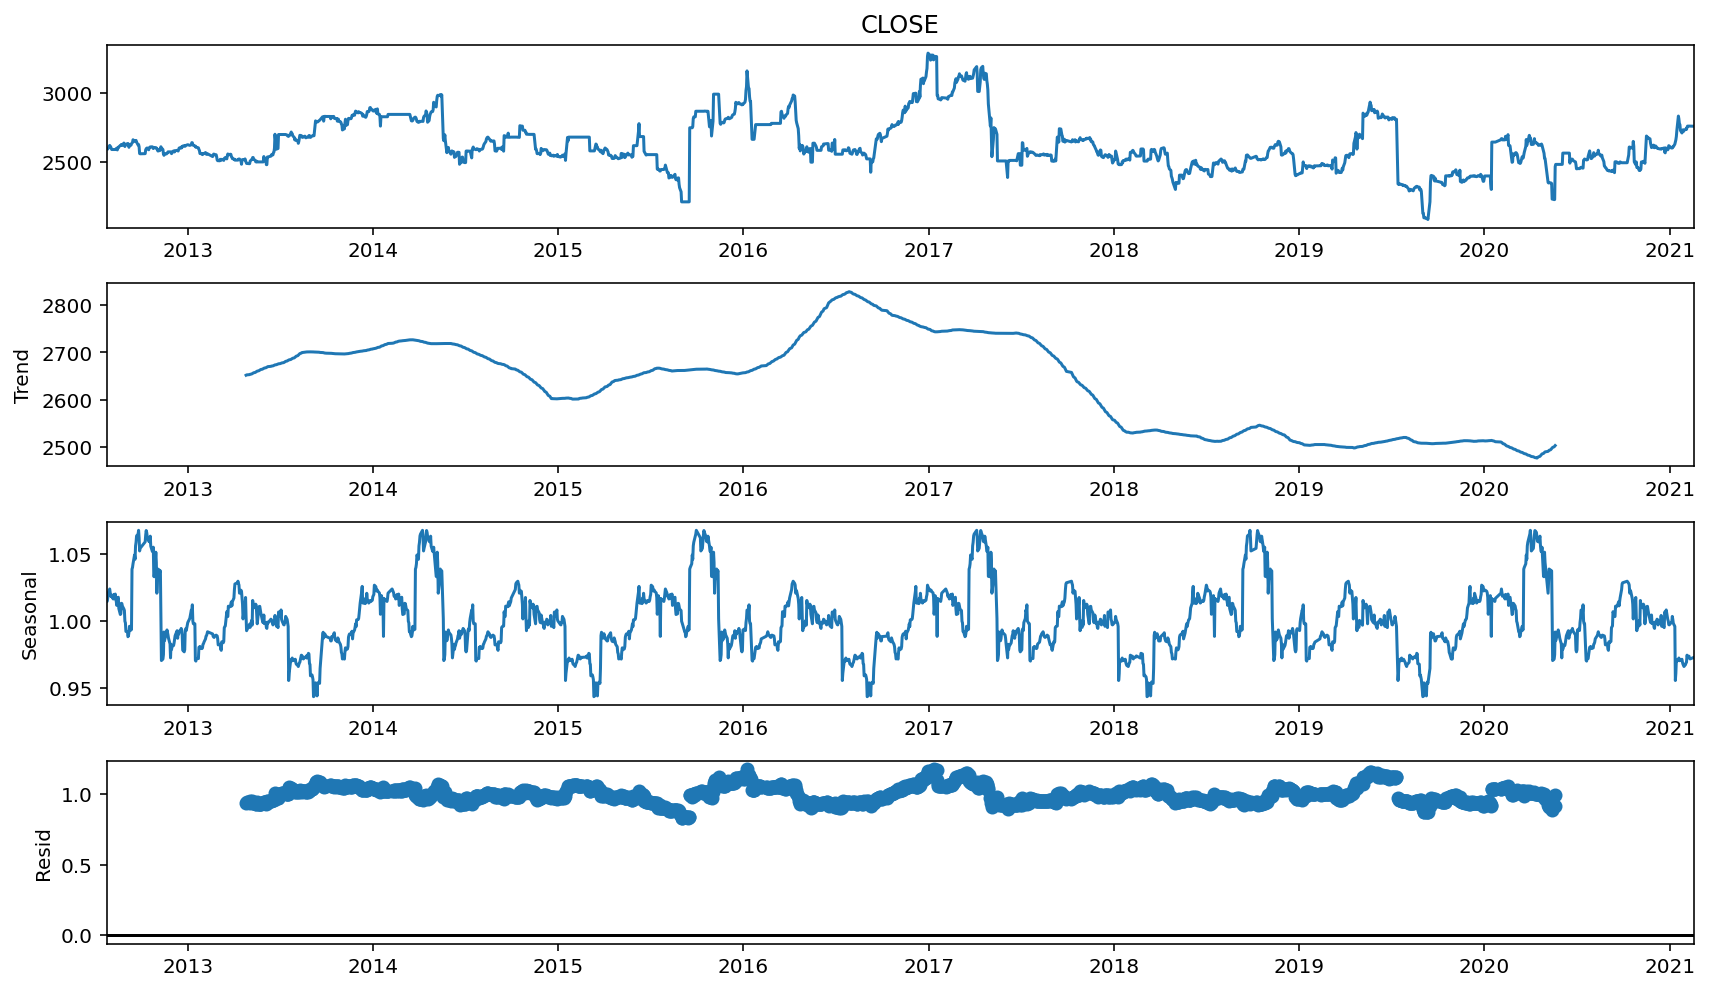

In [9]:
#Multiplicative Wheat Model
multwheat = seasonal_decompose(train_wheat['CLOSE'], model = 'multiplicative', period = 365)
mw = multwheat.plot()

# Additive/Multi Rice Models

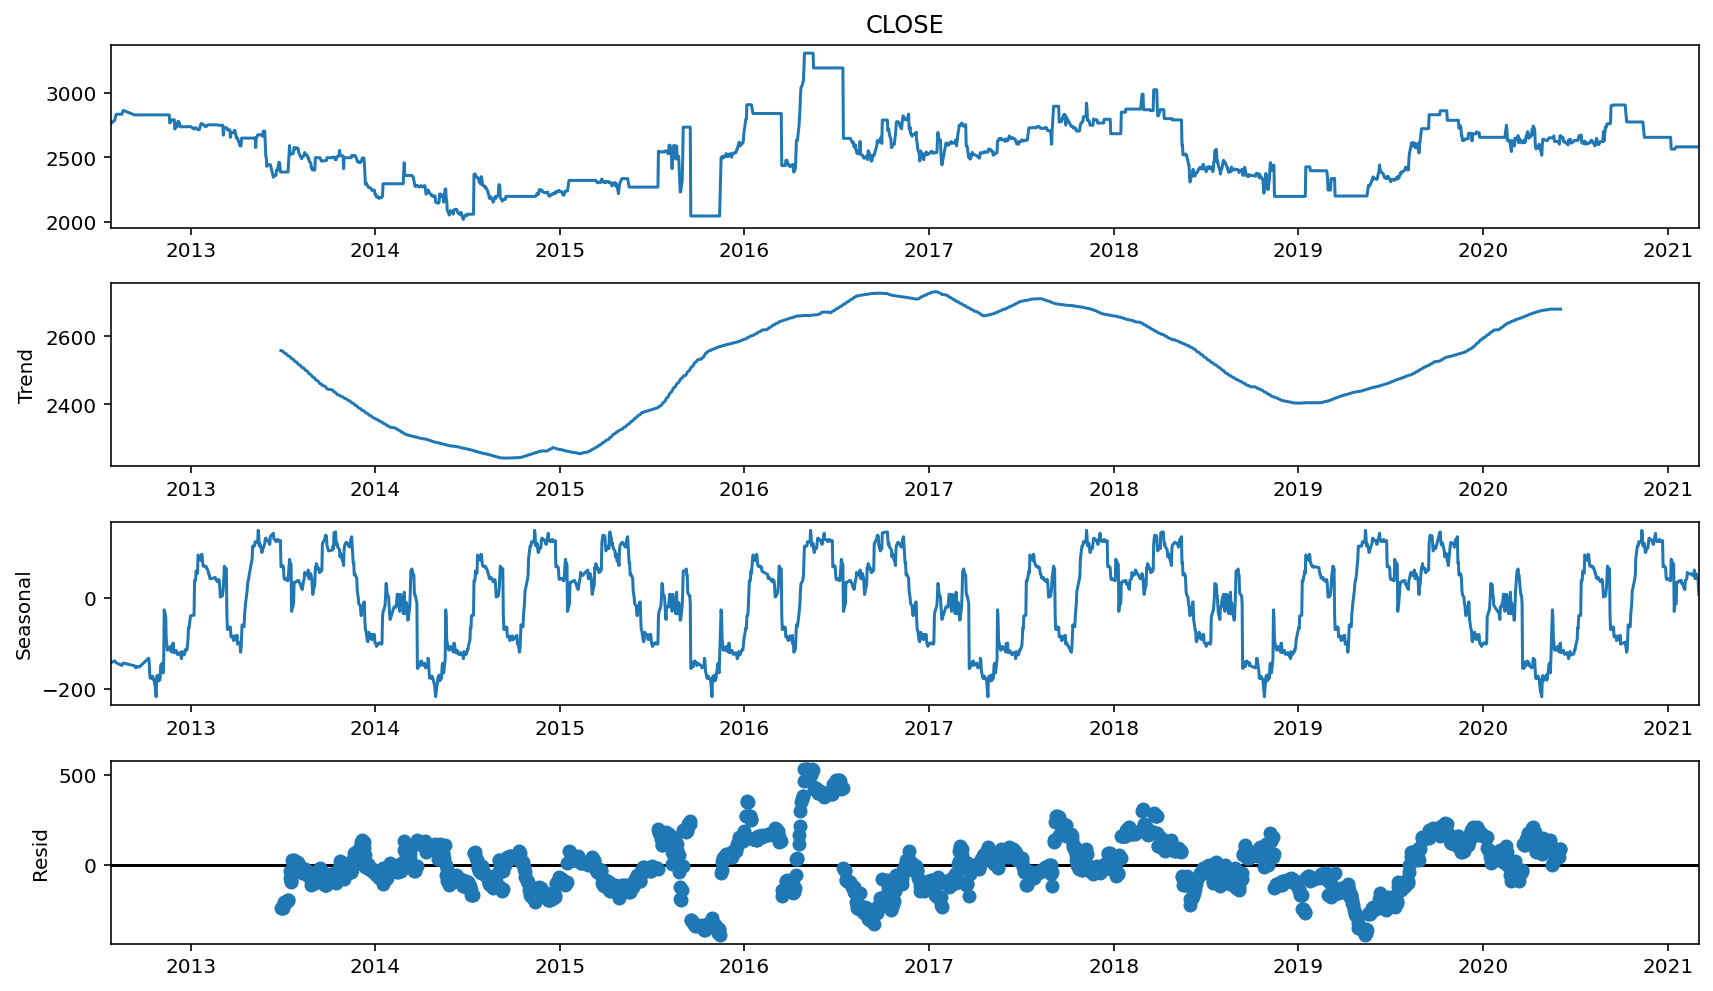

In [10]:
#Additive Rice Model
adrice = seasonal_decompose(train_rice['CLOSE'], model = 'additive', period = 365)
aw = adrice.plot()

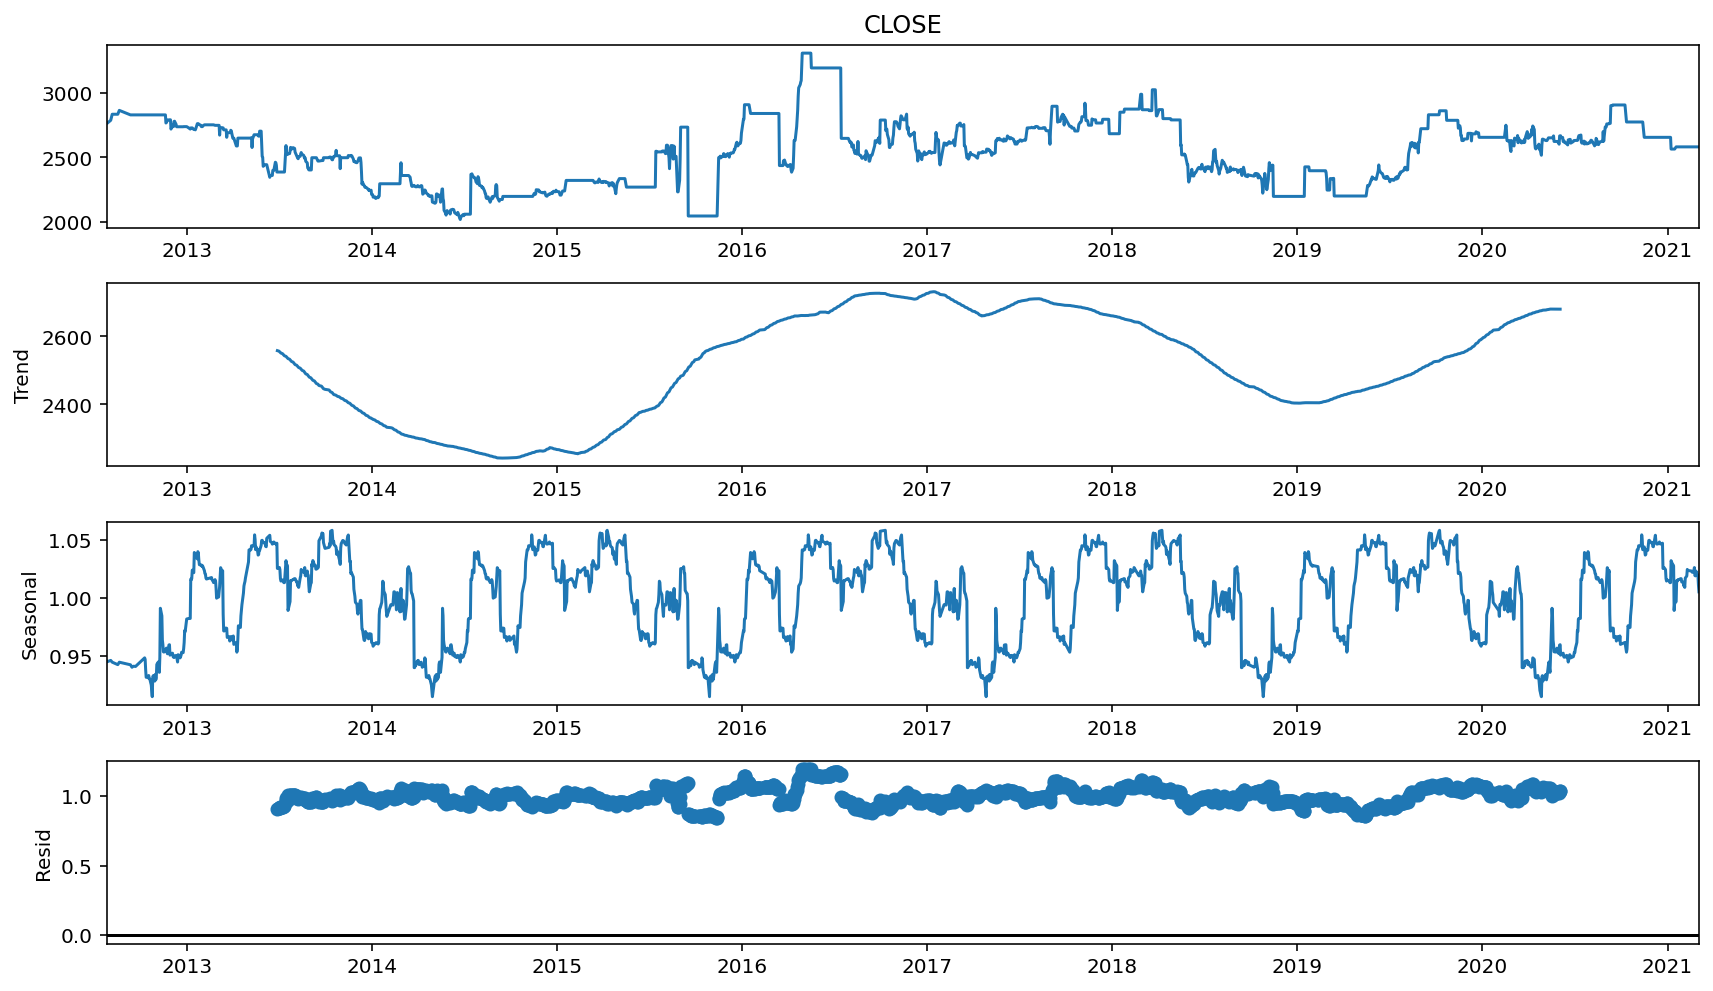

In [11]:
#Multiplicative Rice Model
multrice = seasonal_decompose(train_rice['CLOSE'], model = 'multiplicative', period = 365)
mw=multrice.plot()

# Possible Problems

1. Wheat data experiences a massive drop after 2022. If we use the full data set and split 80/20, we cut out that drop and our predictions using 80% of the data set won't be accurate on the 20% which was the huge drop. Below, we will cut off our original data set before that drop and then split into 80/20 for better predictions. 
2. Rice data has a big drop and huge rebound in 2016 which effects the seasonality of our data. If we cut this out and use some sort of filling technique, we will be able to create a more seasonal trend. Covid doesn't seem to cause too much difference in rice closing prices. 



## Covid free models for wheat

Here, we cut off our wheat data around 2021 to create a more seasonal trend in the data


In [12]:
#Cf stands for covid free or the percieved effect of covid which was after 2021. 

cf_wheat = pd.read_csv('wheat_CH.csv',usecols = [0,4], nrows = 2260) #around where our original 80% train set stops
cf_wheat['Date'] = pd.to_datetime(cf_wheat['Date'])
cf_wheat.set_index('Date', inplace=True)
train_wheatcf, test_wheatcf = train_test_split(cf_wheat, test_size=0.2, random_state=25,shuffle = False)




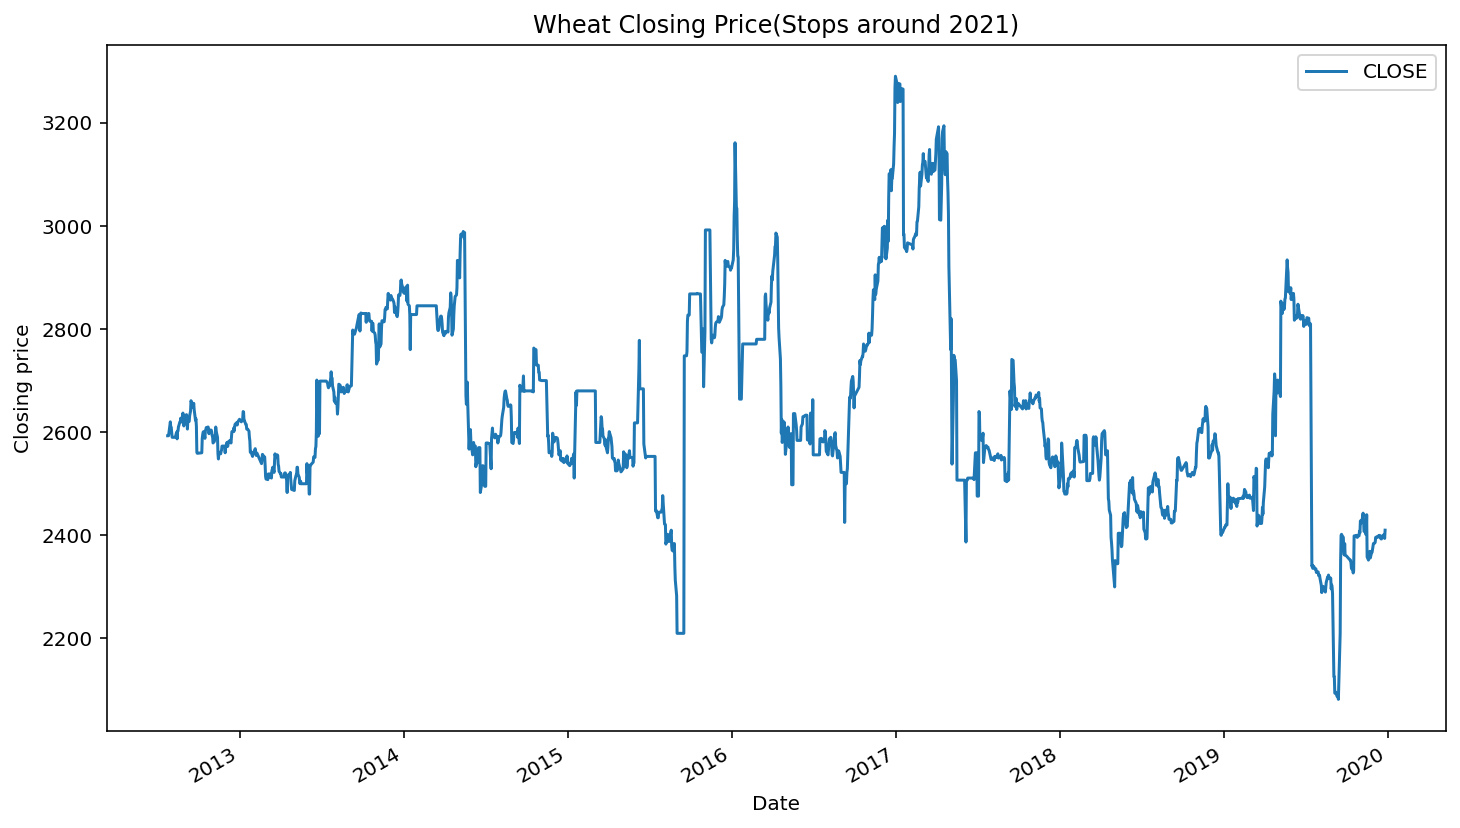

In [13]:
train_wheatcf.plot()
plt.title("Wheat Closing Price(Stops around 2021)")
plt.ylabel("Closing price")
plt.show()

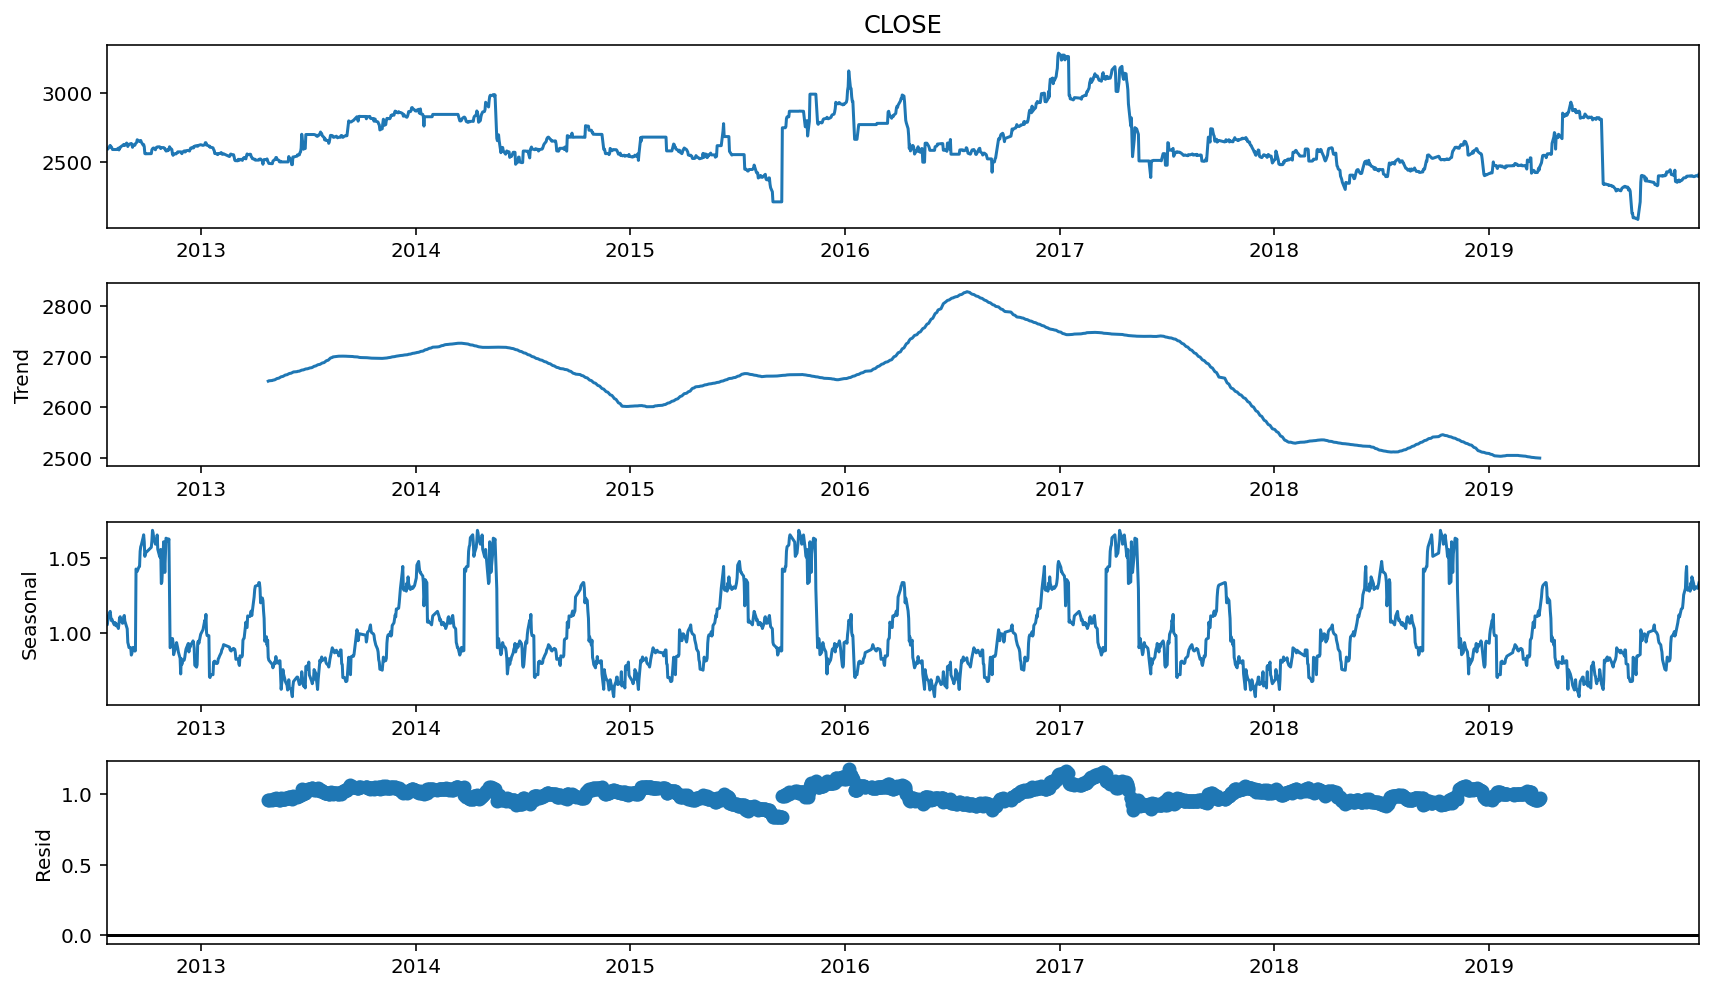

In [14]:
#Multiplicative wheat model
m = seasonal_decompose(train_wheatcf['CLOSE'],model = 'multiplicative', period = 365)
mw = m.plot()
plt.show()

## Rice models\(interpolated\)



Interpolation is normally used to fill in missing data points. Here, we are going to try removing a majority of data from the outlying years\(2016\-2019\) and use interpolation to find a smoother line which will increase seasonality in our data set. 


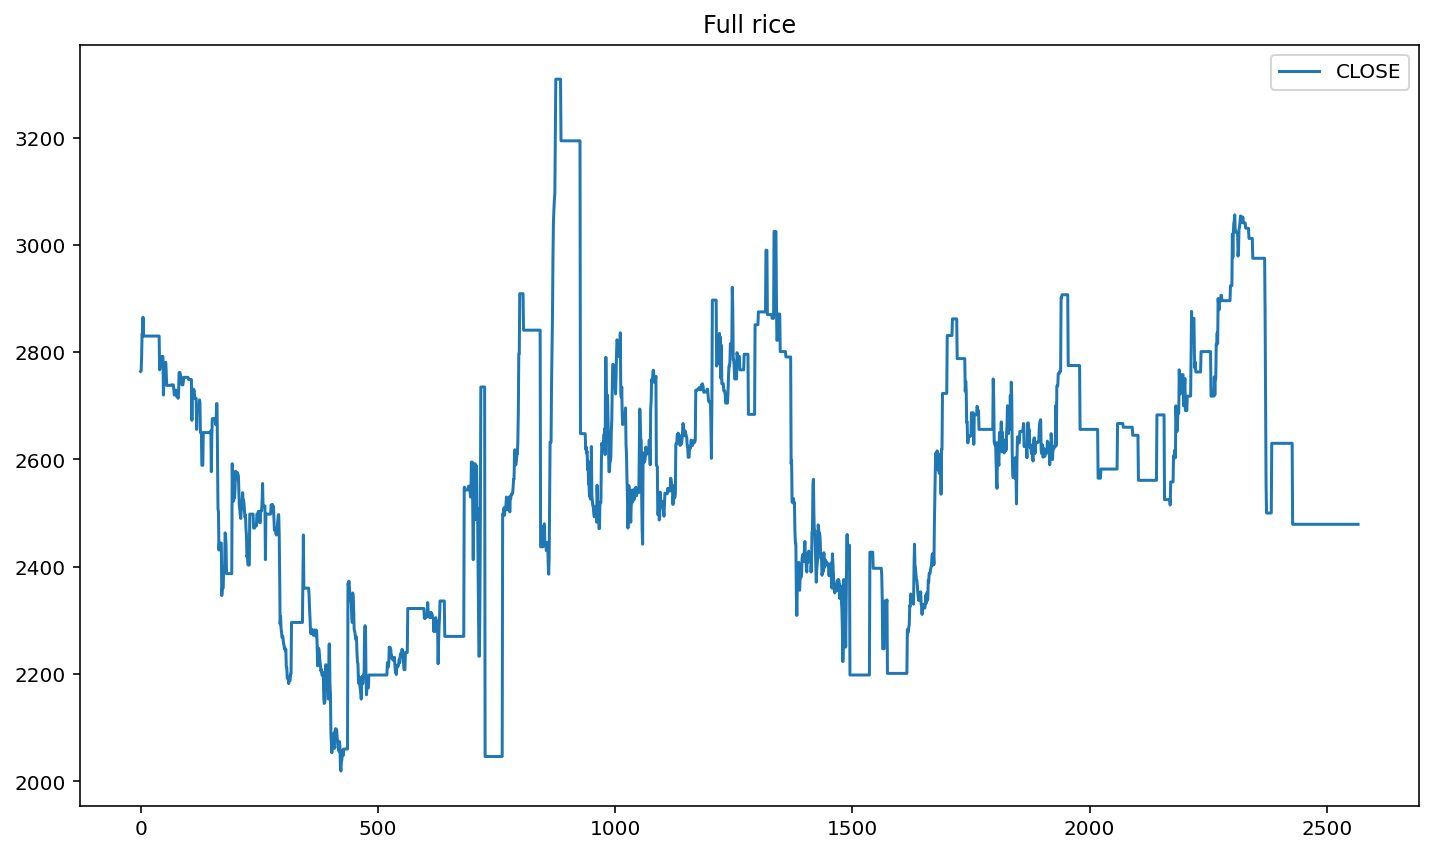

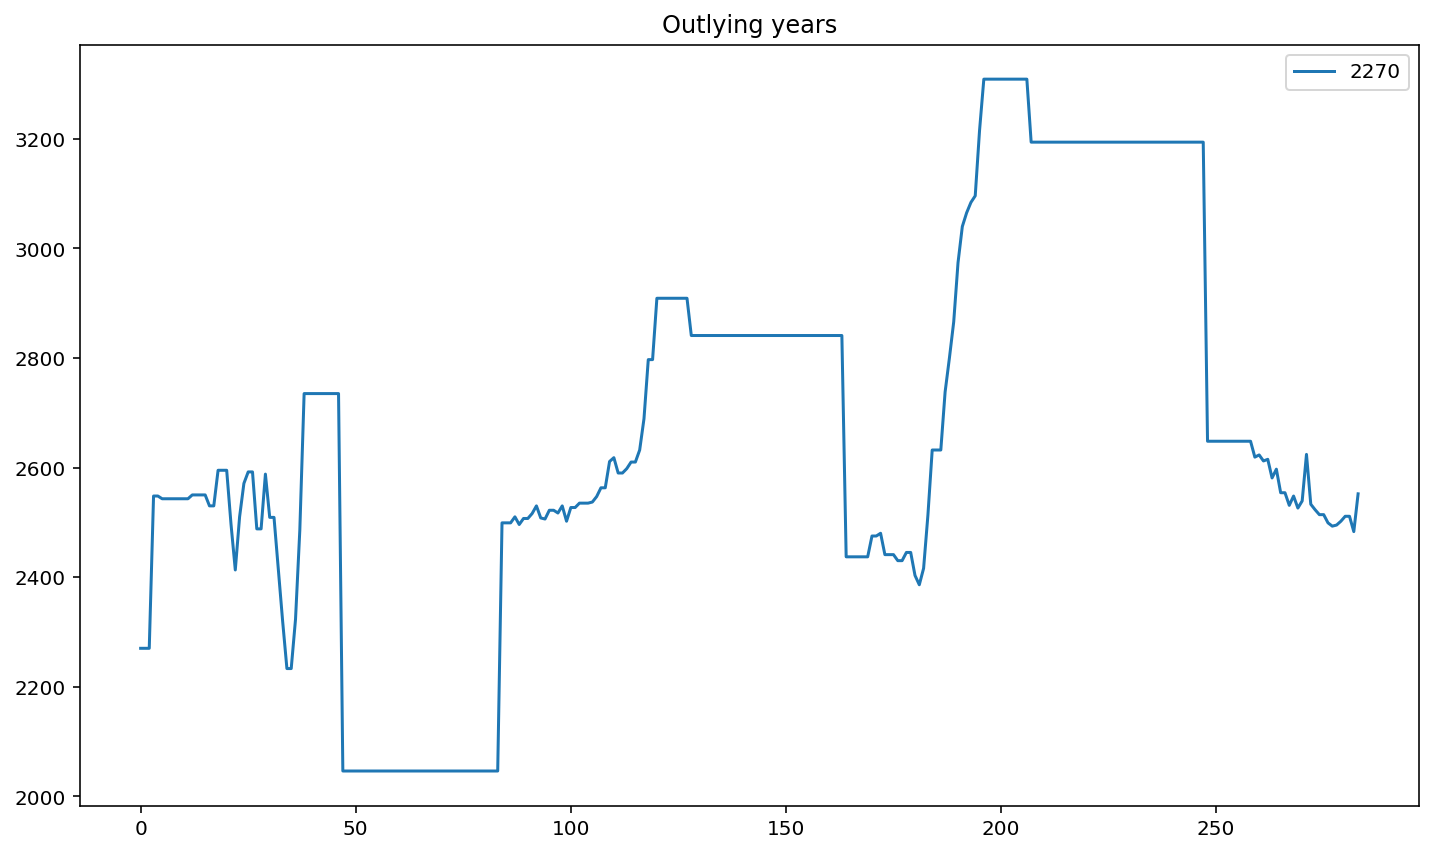

In [15]:
full_df = pd.read_csv('rice_CH.csv', usecols = [0,4])
df = pd.read_csv('rice_CH.csv', usecols = [0,4],skiprows = 679, nrows = 284)

full_df.plot()
plt.title("Full rice")
df.plot()
plt.title("Outlying years")
plt.show()


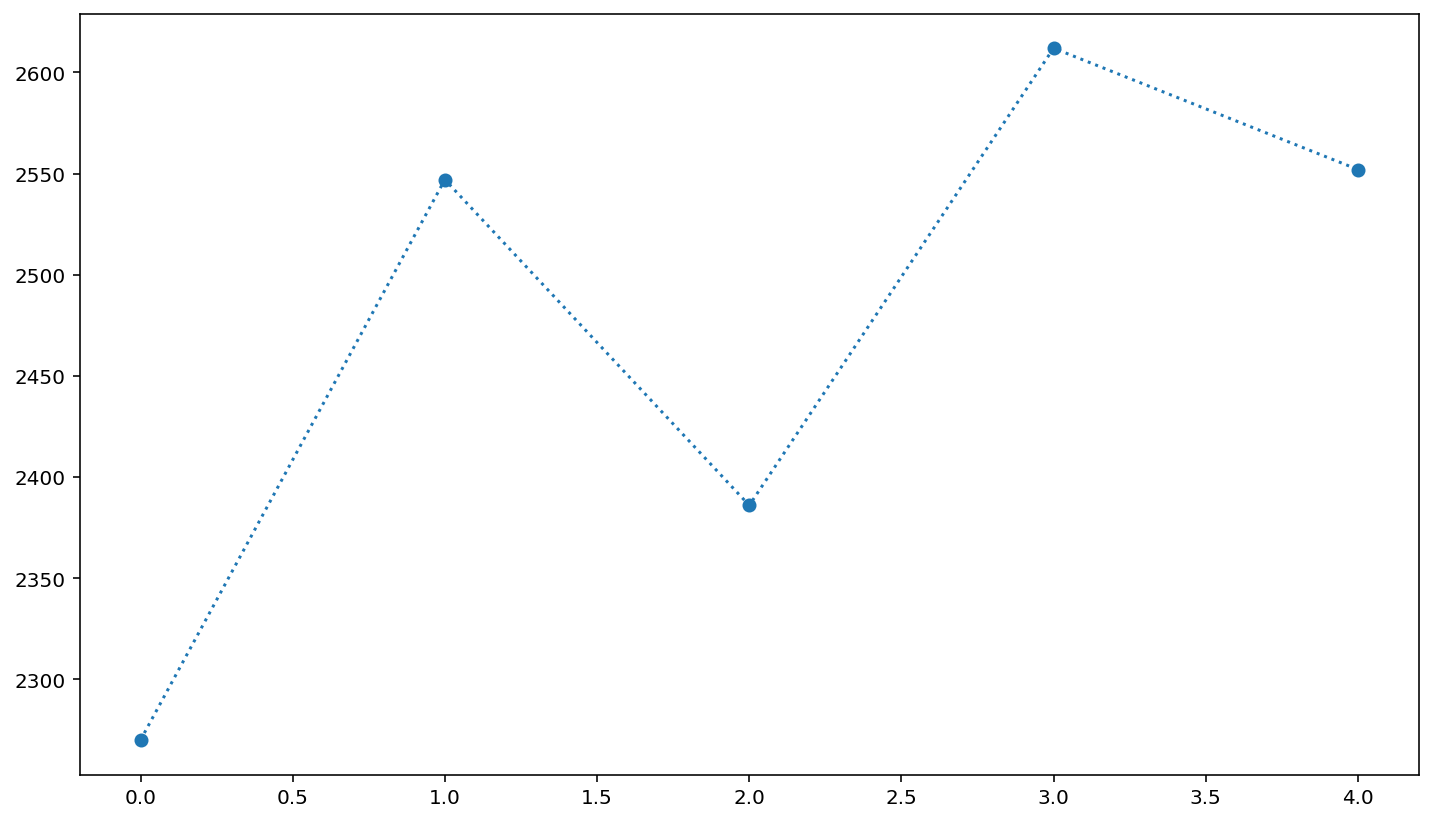

In [16]:
## Convert df to seperate num py arrays for interpolation. 
X = df.iloc[:, 0].to_numpy()
Y = df.iloc[:, 1].to_numpy()

## Choose some datapoints from oringinal to create lower magnitude peaks. 
X1 = np.arange(5)
Y1 = np.array([2270,2547,2386,2612,2552])
plt.plot(X1,Y1,"o:")
plt.show()


In [17]:
from scipy.interpolate import interp1d

284


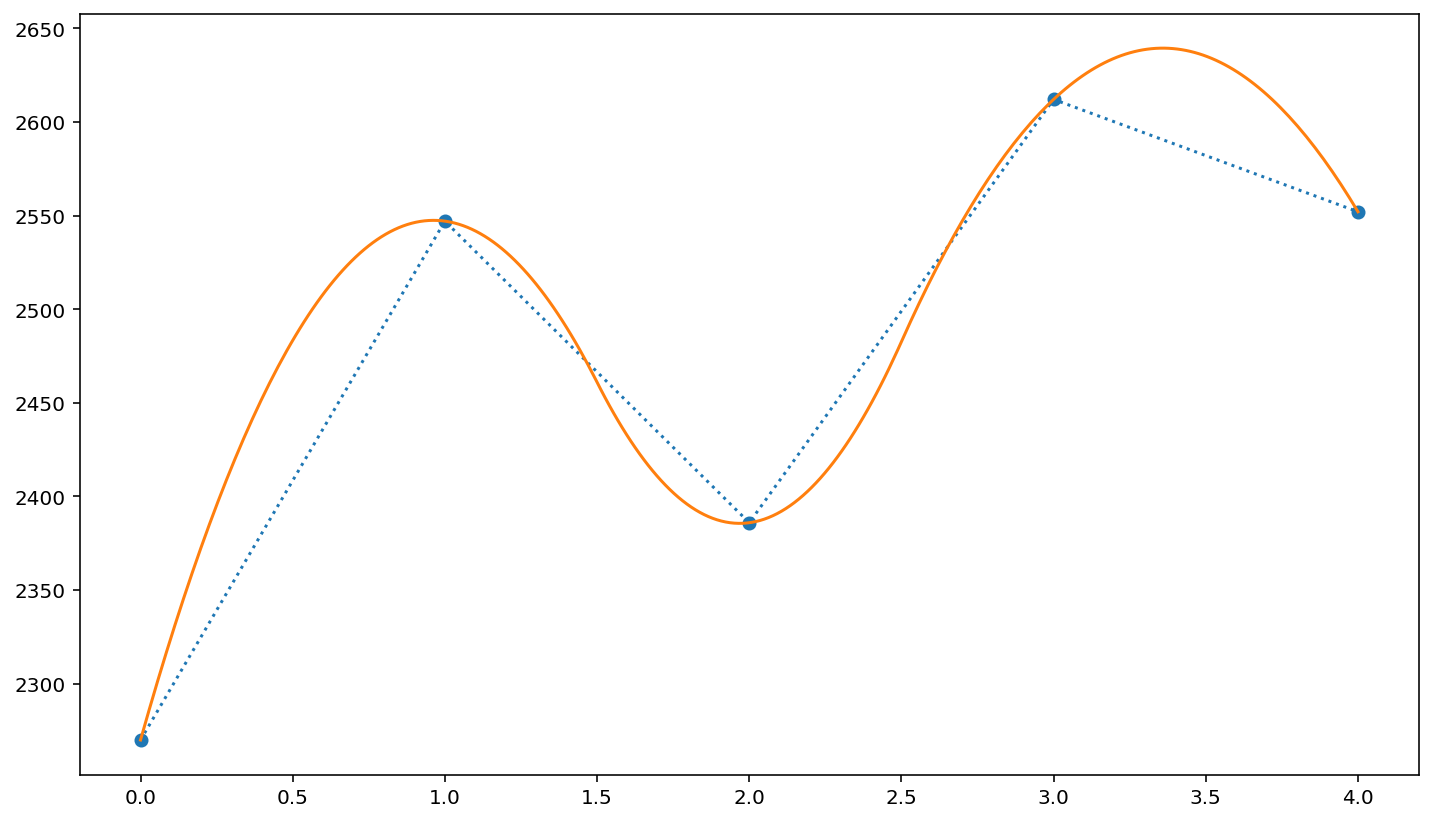

In [18]:
predict = interp1d(X1,Y1, kind = 'quadratic')
X2 = np.linspace(0,4,284)
Y2 = np.array([predict(x) for x in X2])

plt.plot(X1,Y1,"o:")
plt.plot(X2,Y2)
plt.show()

In [19]:
## Replacing our old with new interpolated data. 
full_df.iloc[680:964,1] = Y2
full_df['Date'] = pd.to_datetime(full_df['Date'])
full_df.set_index('Date',inplace = True)
train_rice1, test_rice1 = train_test_split(full_df, test_size=0.2, random_state=25,shuffle=False)


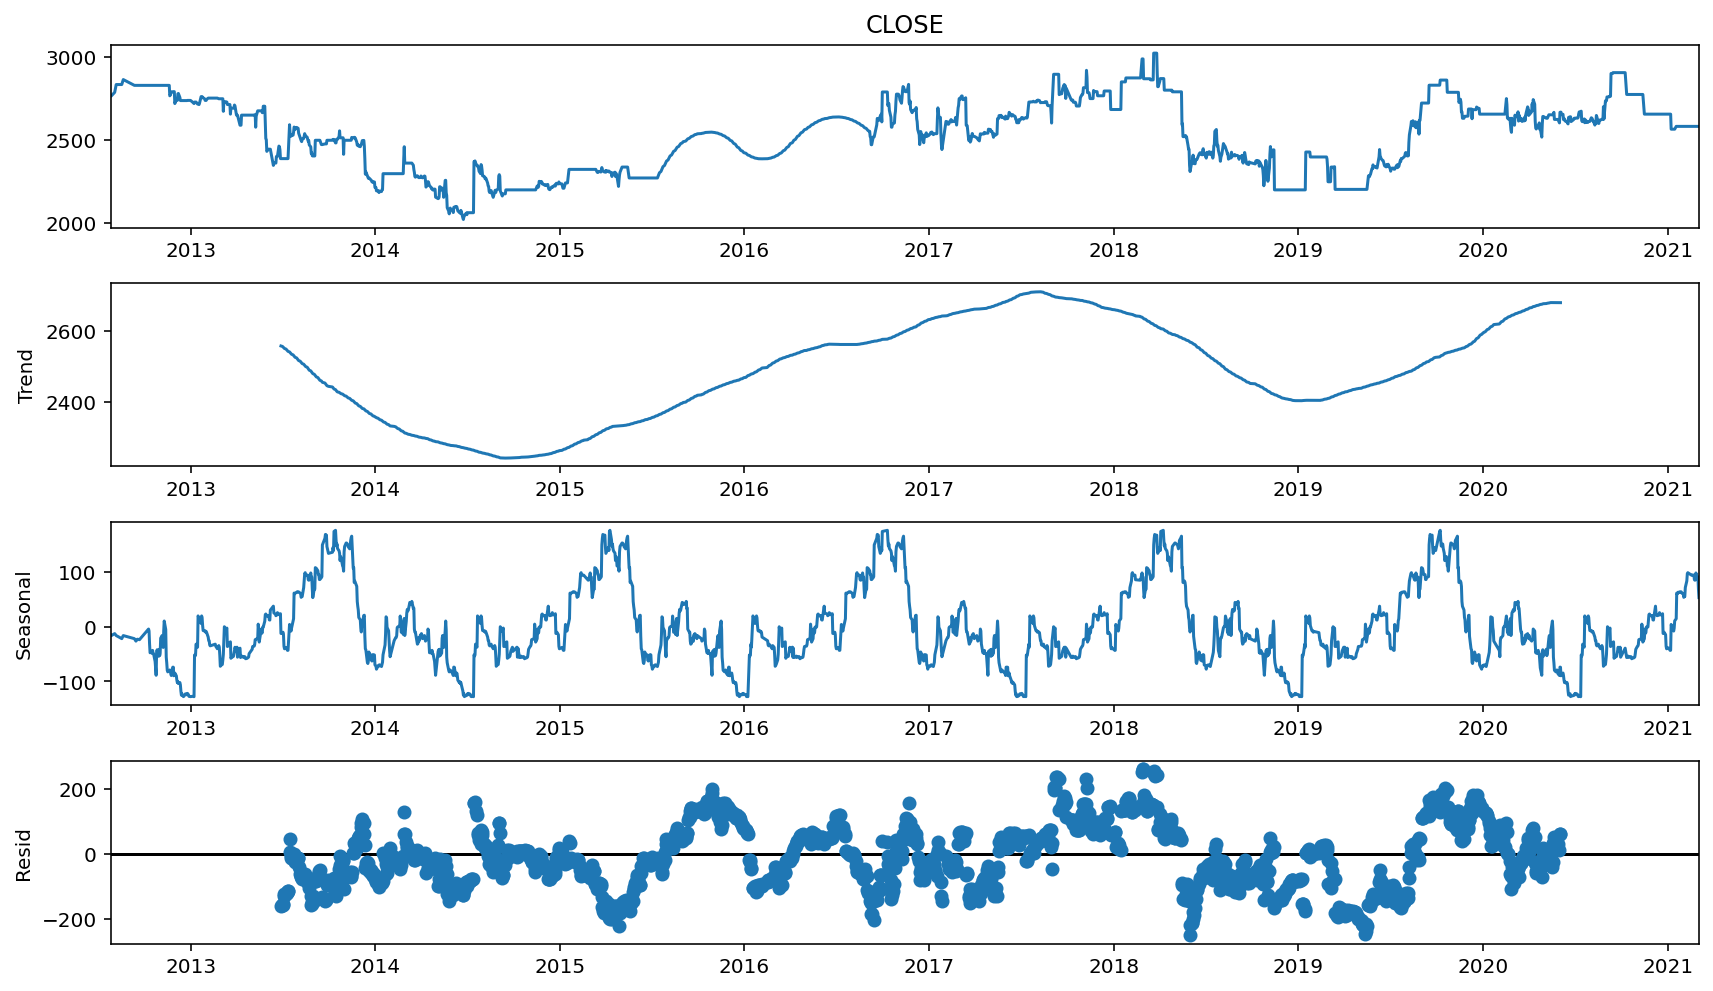

In [20]:
#Additive Rice Model
adrice1 = seasonal_decompose(train_rice1['CLOSE'], model = 'additive', period = 365)
ar1 = adrice1.plot()

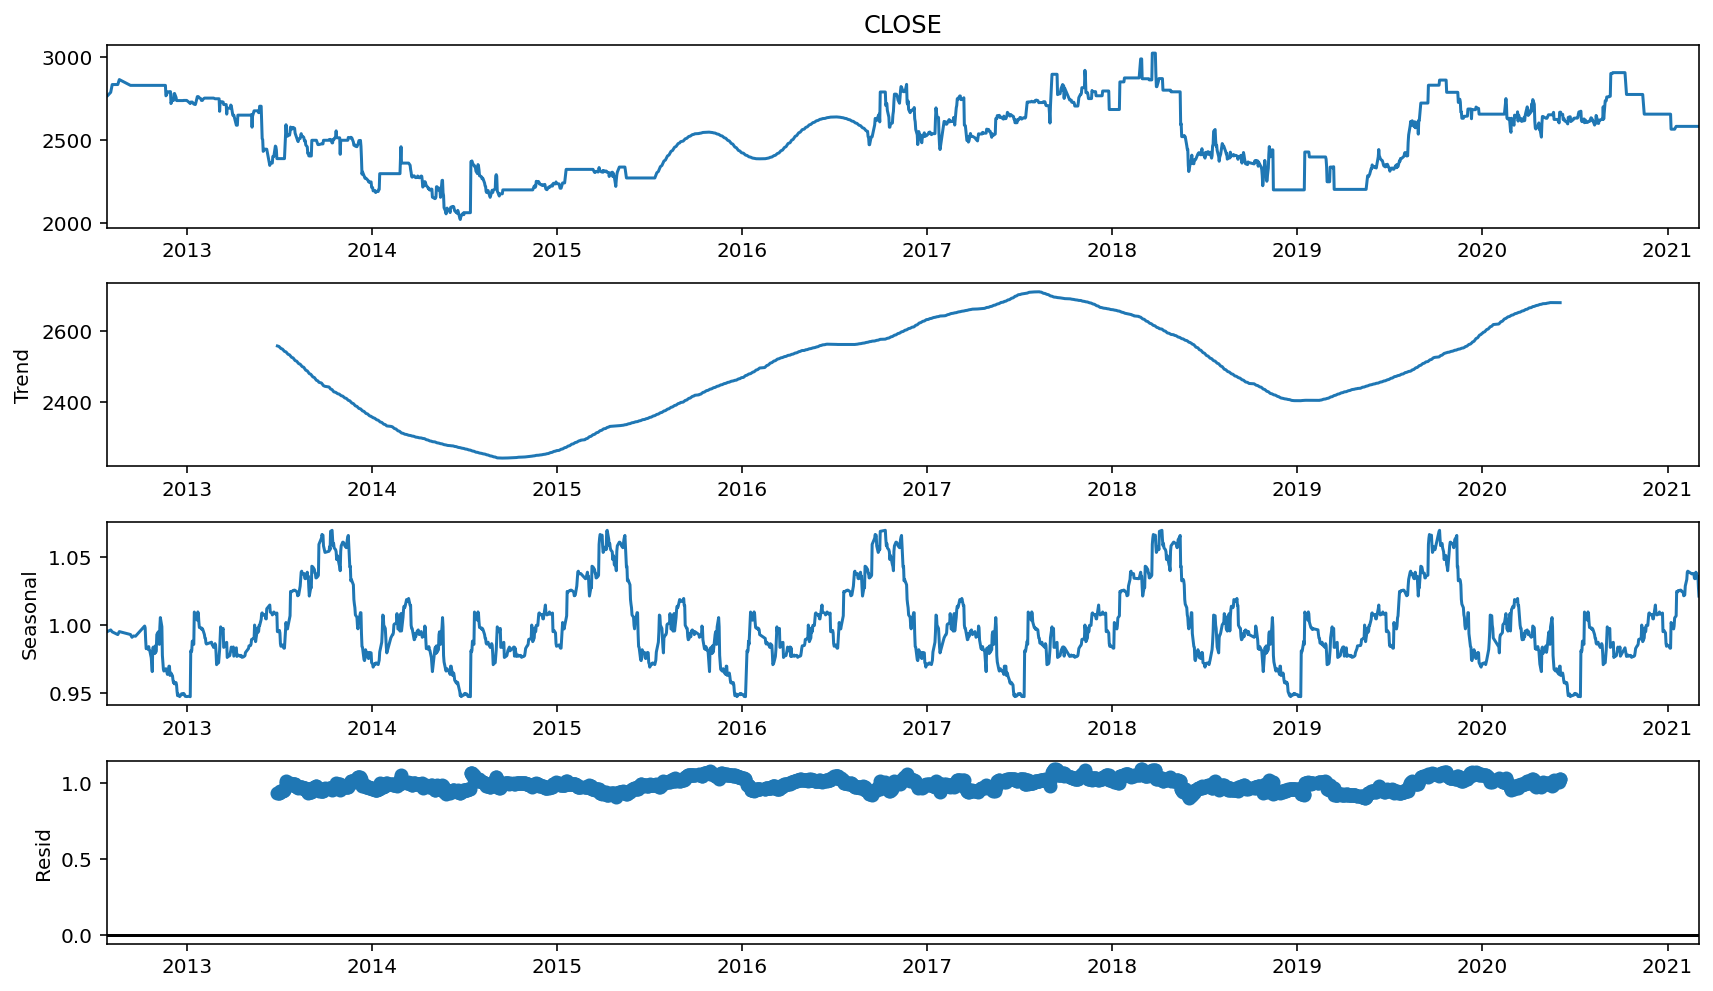

In [21]:
#Mult Rice Model
mrice1 = seasonal_decompose(train_rice1['CLOSE'], model = 'multiplicative', period = 365)
mr1 = mrice1.plot()

## Same interpolation process with a larger data set to infer data from. 


[2270 2270 2270 2548 2548 2543 2543 2543 2543 2543 2543 2543 2550 2550
 2550 2550 2530 2530 2595 2595 2595 2497 2413 2510 2571 2592 2592 2488
 2488 2588 2509 2509 2414 2320 2233 2233 2323 2486 2735 2735 2735 2735
 2735 2735 2735 2735 2735 2046 2046 2046 2046 2046 2046 2046 2046 2046
 2046 2046 2046 2046 2046 2046 2046 2046 2046 2046 2046 2046 2046 2046
 2046 2046 2046 2046 2046 2046 2046 2046 2046 2046 2046 2046 2046 2046
 2499 2499 2499 2510 2496 2507 2507 2516 2530 2508 2506 2522 2522 2517
 2530 2502 2527 2527 2535 2535 2535 2537 2547 2563 2563 2611 2618 2590
 2590 2598 2610 2610 2632 2689 2797 2797 2909 2909 2909 2909 2909 2909
 2909 2909 2841 2841 2841 2841 2841 2841 2841 2841 2841 2841 2841 2841
 2841 2841 2841 2841 2841 2841 2841 2841 2841 2841 2841 2841 2841 2841
 2841 2841 2841 2841 2841 2841 2841 2841 2841 2841 2437 2437 2437 2437
 2437 2437 2475 2475 2480 2441 2441 2441 2430 2430 2445 2445 2403 2386
 2416 2513 2632 2632 2632 2738 2800 2866 2974 2648 2648 2648 2648 2648
 2648 

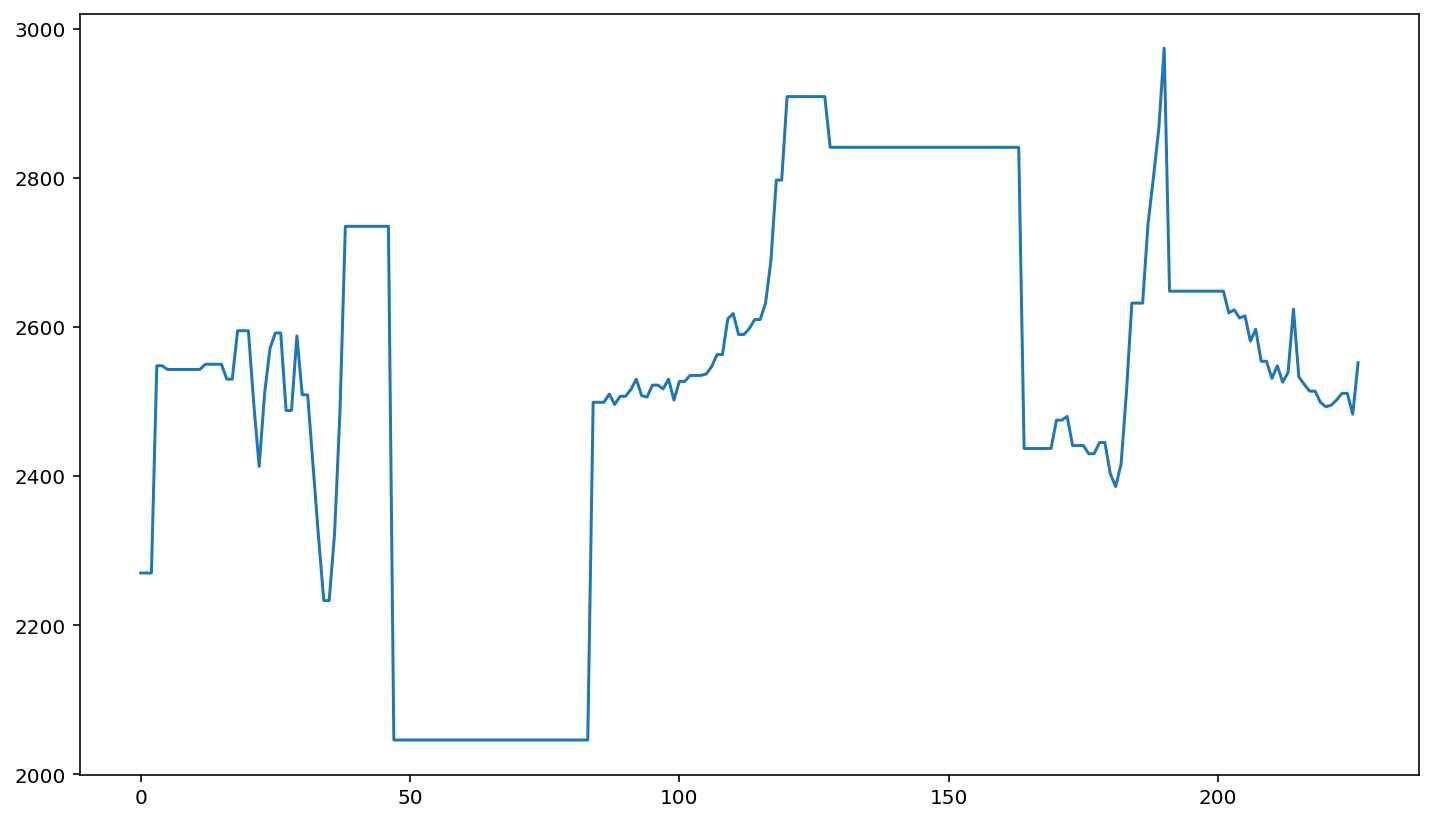

In [22]:
dates = df.iloc[:, 0].to_numpy()
prices = df.iloc[:, 1].to_numpy()

filtered_prices= prices[prices <= 3000]

filtered_dates = np.arange(filtered_prices.size)
plt.plot(filtered_dates,filtered_prices)
 
##interpolation function
predicted = interp1d(filtered_dates,filtered_prices, kind = 'quadratic')

predicted_ = np.array([predict(x) for x in X2])